<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/7.%20Feature%20Transformation-%20Intro%20and%20Function%20Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🔄 **Feature Transformation: Enhancing Data Distributions for Robust Modeling**

<div align="justify">

In real-world datasets, features often display properties like **skewed distributions**, **non-linearity**, or **heteroscedasticity** (i.e., non-constant variance). Such characteristics can violate the assumptions of many statistical and machine learning algorithms—particularly those relying on linearity, normality, or distance-based metrics.

Feature transformation involves applying mathematical functions to reshape feature distributions, reduce skewness, and stabilize variance, thereby making the data more suitable for analytical modeling. Unlike feature scaling—which only standardizes the range or magnitude — <span style="color:red;"><b>transformation methods alter the distributional form of the data.</b></span>

While many algorithms benefit from Gaussian-like data distributions (e.g., Linear Regression, PCA, LDA), real-world data rarely conforms to these assumptions. Thus, transformation becomes a crucial preprocessing step when working with skewed or non-normal data, helping uncover hidden patterns and improving model interpretability and performance.

In this section, we will explore key transformation techniques that convert non-normal features into more statistically tractable forms —**without compromising their core information**.

#### 📚 <u>Types of Feature Transformation Techniques:- </u>

We will focus on the following three major transformation categories:

- **Function Transformers** – Apply user-defined mathematical functions (e.g., log, sqrt, cbrt).
- **Power Transformers** – Use Box-Cox or Yeo-Johnson methods to approximate a normal distribution.
- **Quantile Transformers** – Map feature values to follow a uniform or normal distribution via rank-based quantiles.

#### 📌 <u>Why Feature Transformation?</u>

- Reduce skewness and make data more symmetric.
- Stabilize variance across the feature space.
- Make data more compatible with algorithms that assume Gaussian-like distributions.
- Reveal hidden patterns or linear relationships.
- Improve the effectiveness of techniques like PCA, LDA, or linear regression.

> 🔬 In essence, **feature transformation** is a powerful tool that bridges the gap between raw, messy real-world data and the assumptions made by statistical and machine learning models. When used appropriately, it can significantly improve both model accuracy and the validity of insights drawn from the data.

</div>

<div align="justify">

We shall now begin with **Function Transformers**, which allow us to apply custom or predefined mathematical transformations to features — an essential tool for reshaping data distributions in a flexible and modular way.

### **Function Transformers**

Function transformers are a class of feature transformation techniques that apply **mathematical functions** to reshape the distribution of data — often aiming to approximate a normal (Gaussian) distribution.

Unlike scaling techniques that standardize feature ranges, function transformers operate directly on the observed values by applying a defined function to each data point.

There is no strict rule for choosing a specific function; the selection largely depends on the data characteristics and domain knowledge. However, certain transformations are widely used because of their consistent ability to reduce skewness and improve normality.

#### 📌 Common Function Transformations:
- **Log Transform** – Useful for right-skewed data with large positive values
- **Square Transform** – Amplifies large values; can help with left-skewed data
- **Square Root Transform** – Mild correction for moderate right skew
- **Reciprocal Transform** – Useful for strong right skew, but sensitive to zeros
- **Custom Transform** – Any user-defined transformation based on domain-specific insights

> 🔍 These transformations are especially useful as preprocessing steps before applying models that assume **linear relationships** or **normally distributed inputs**, such as Linear Regression, LDA, and PCA.

</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing   import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.pipeline        import Pipeline

In [2]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [5]:
X = X.iloc[:,:-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]])
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

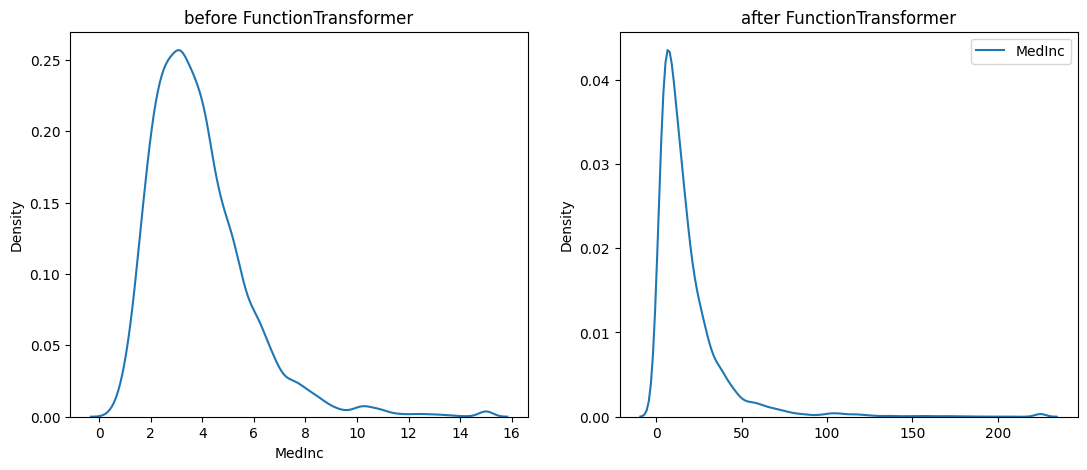

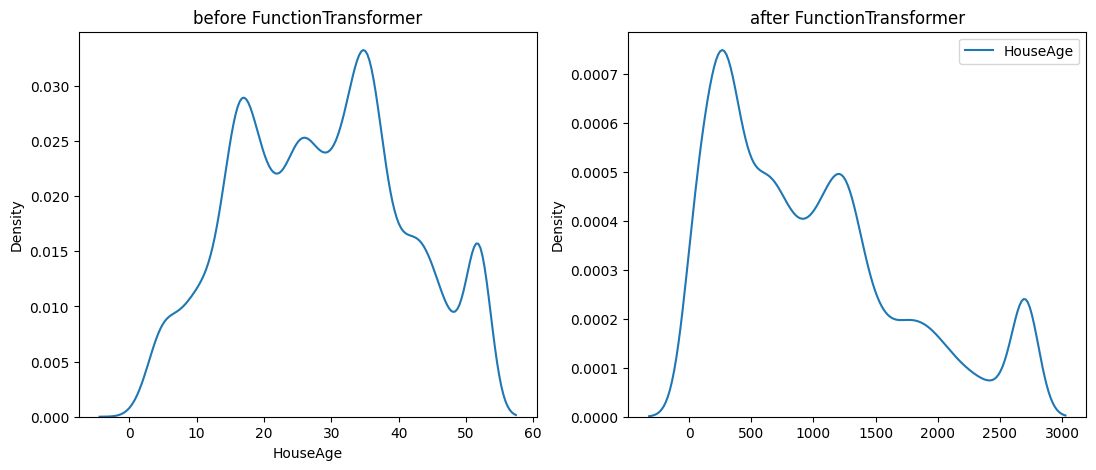

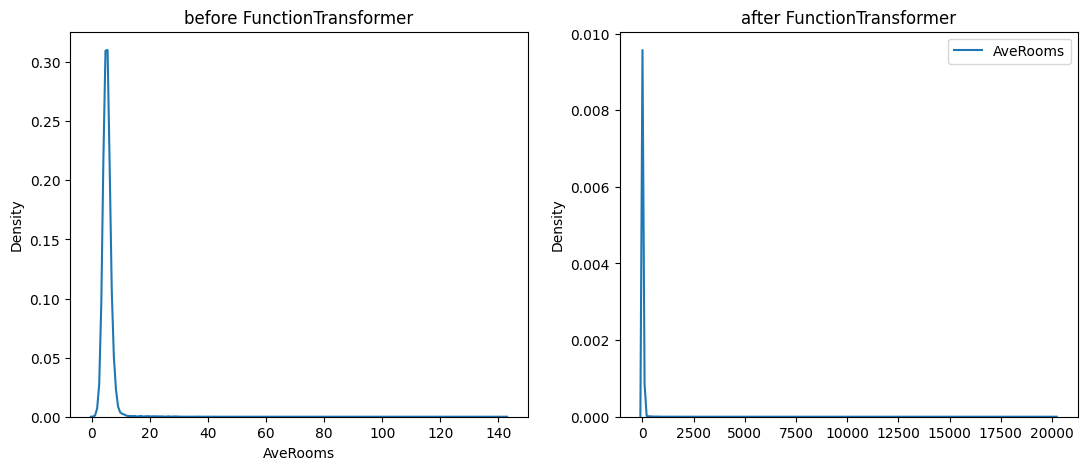

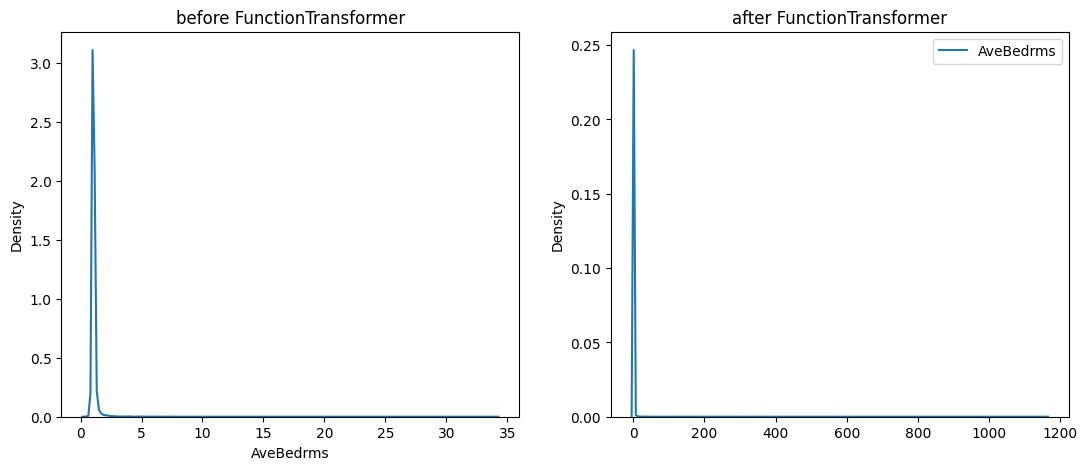

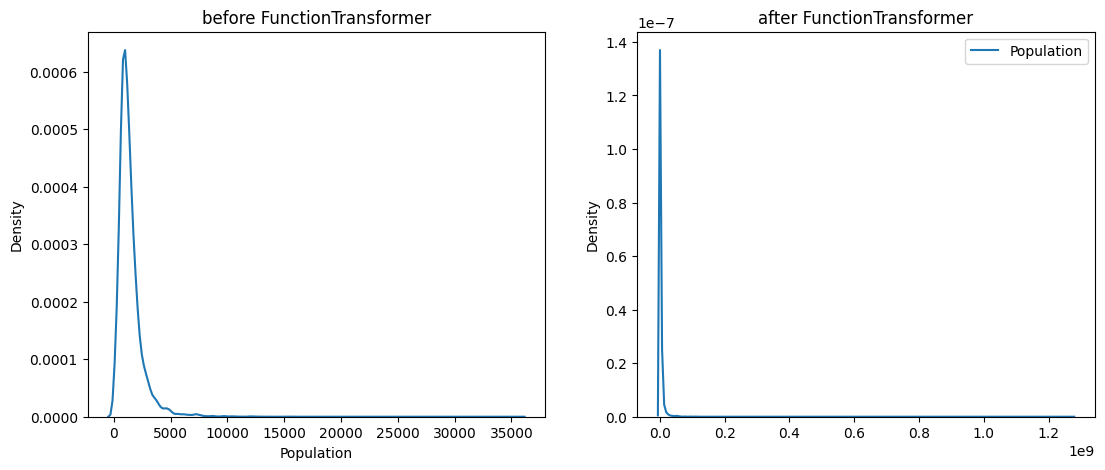

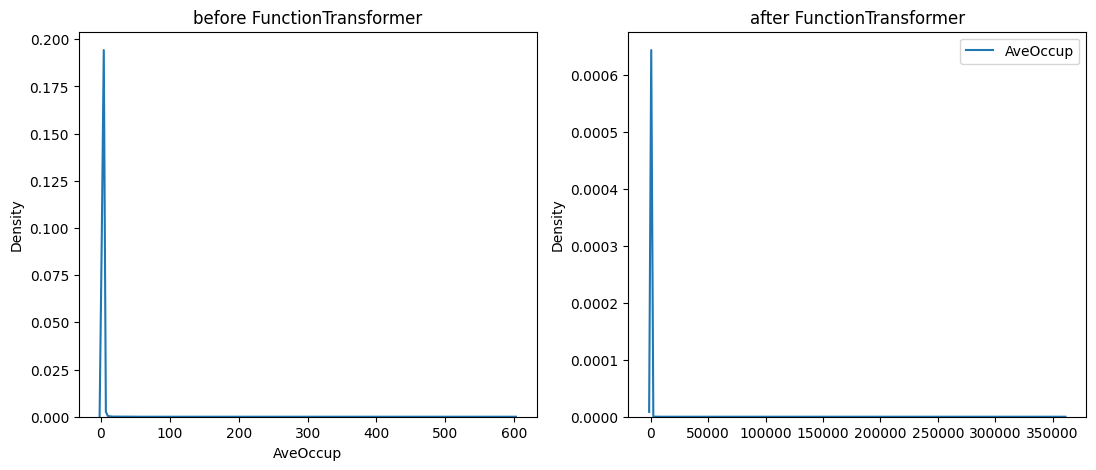

In [8]:
for col in x_train.columns:
  plots(x_train, col, FunctionTransformer(lambda x: x**2))

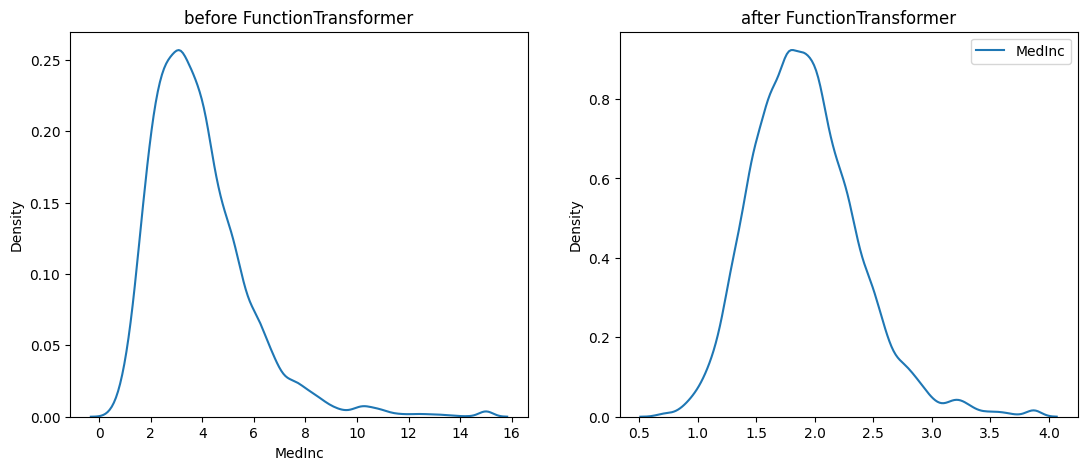

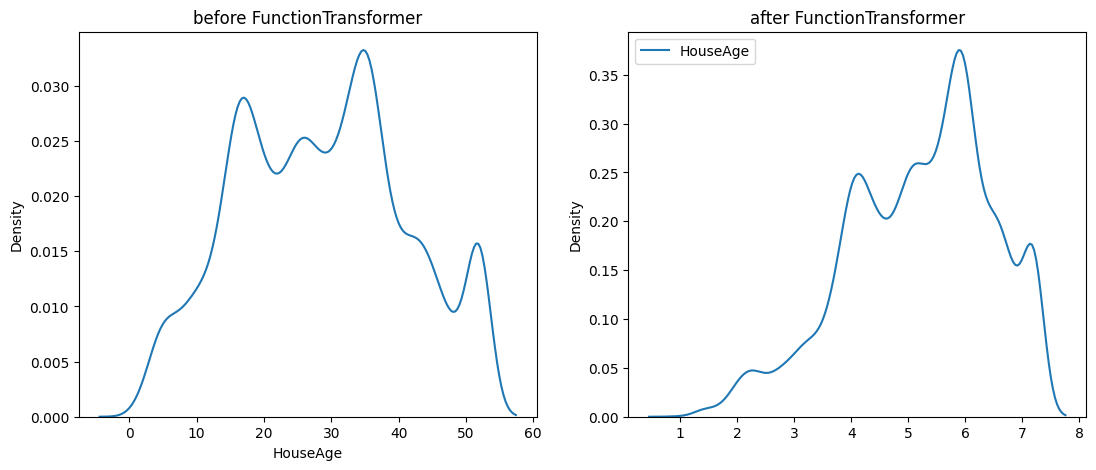

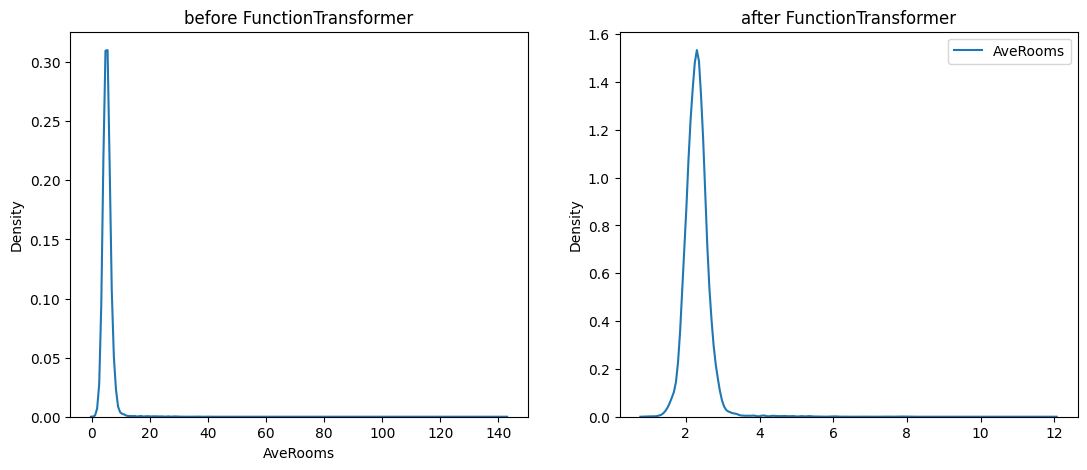

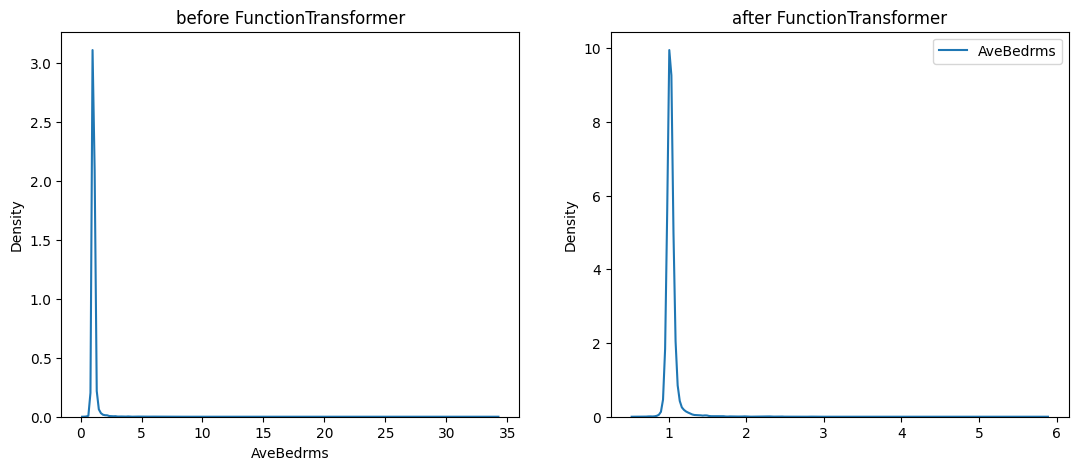

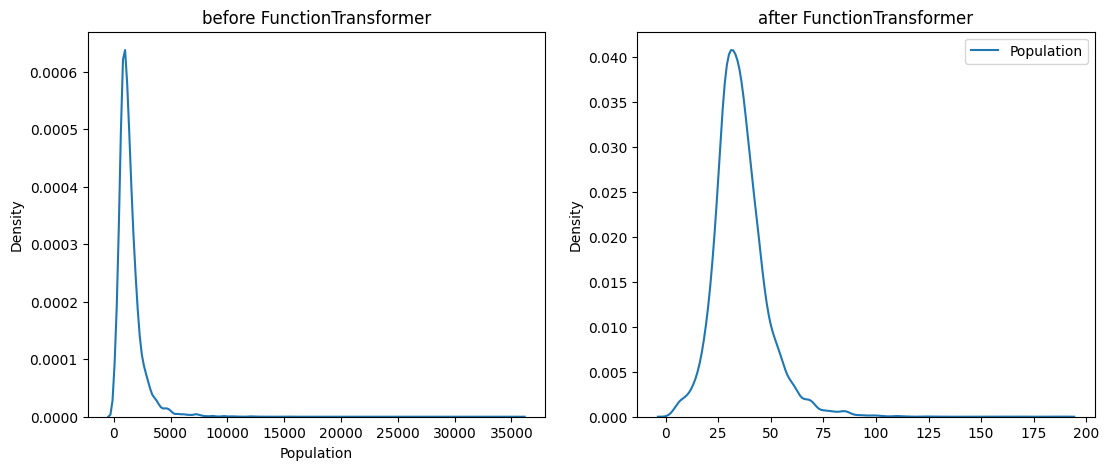

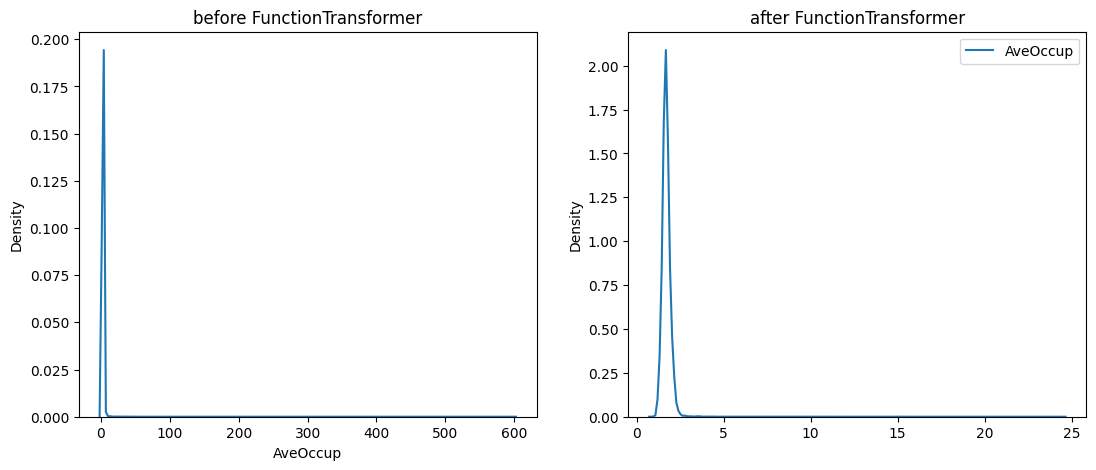

In [9]:
for col in x_train.columns:
  plots(x_train, col, FunctionTransformer(lambda x: x**(1/2)))

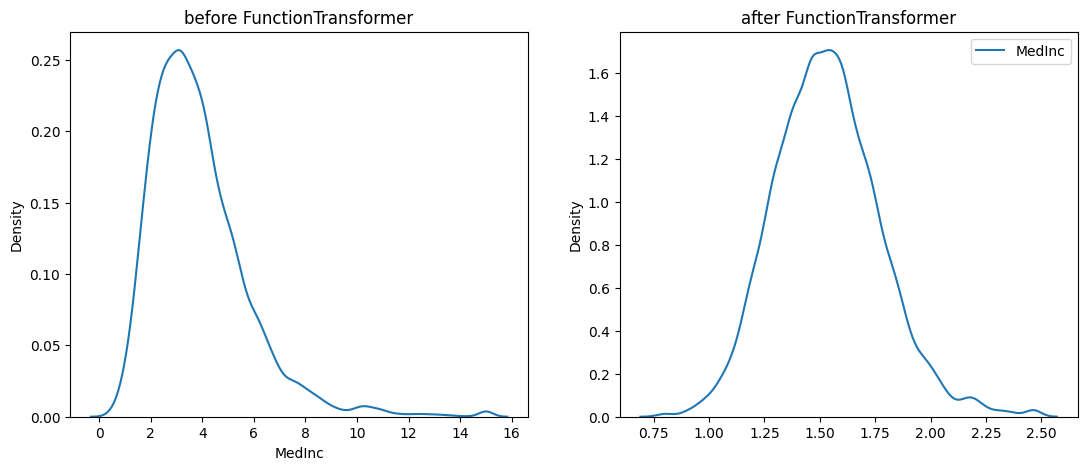

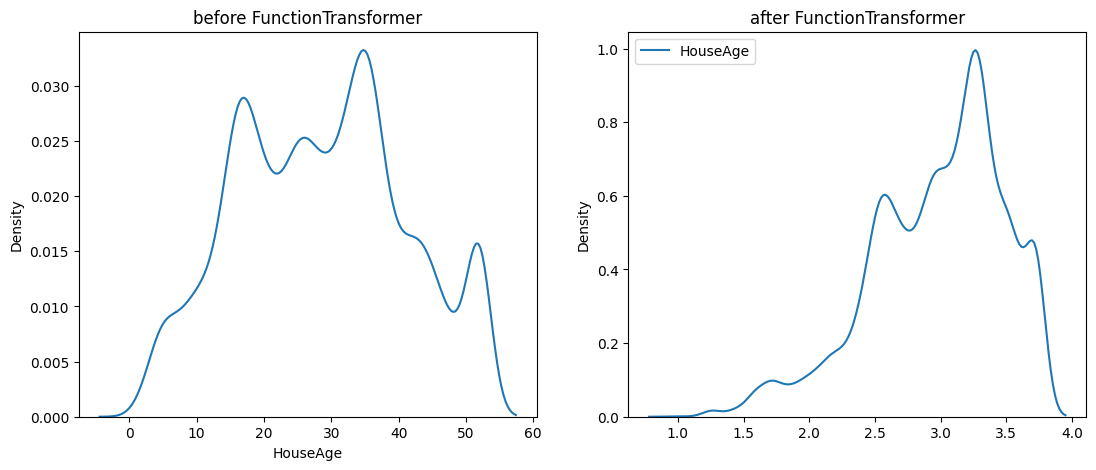

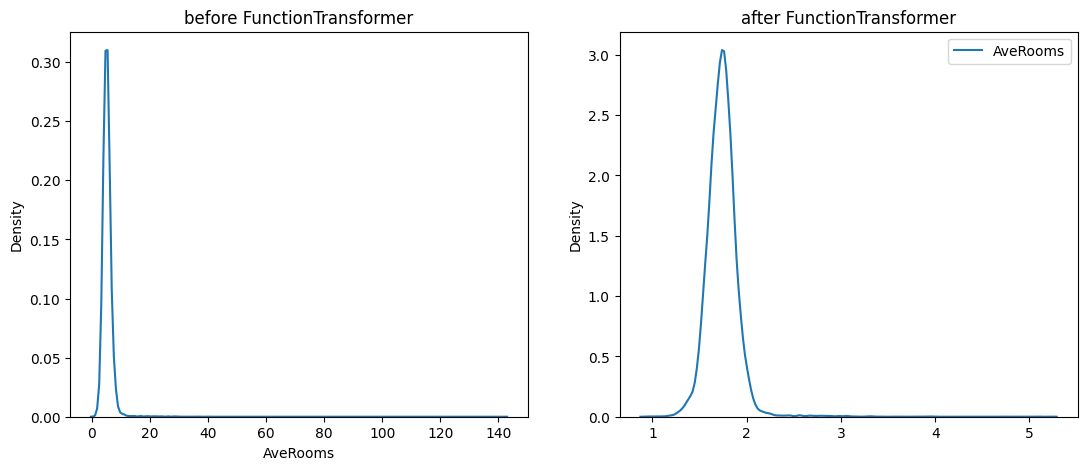

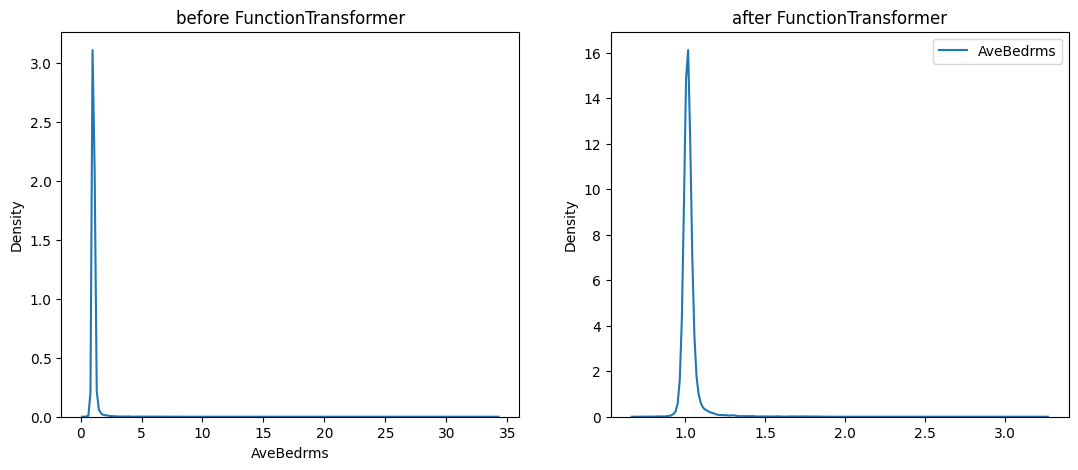

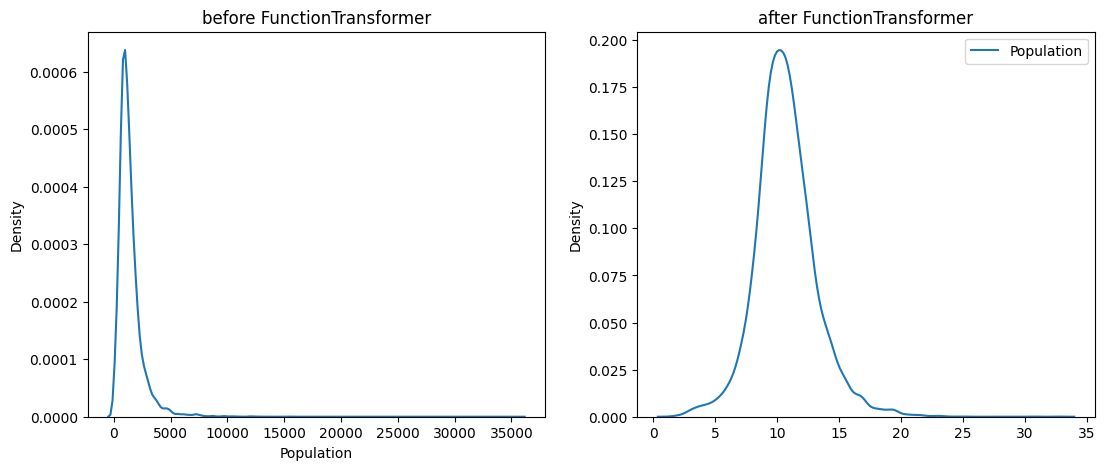

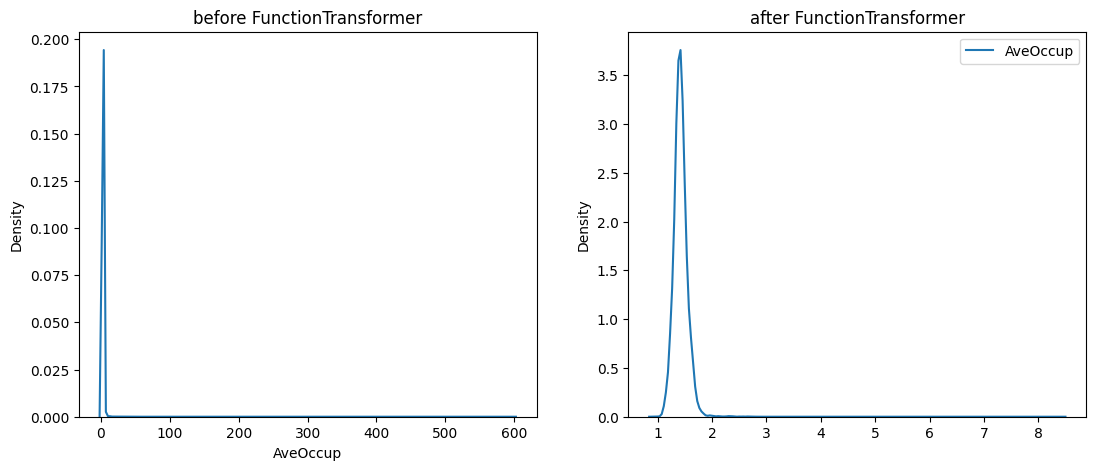

In [10]:
for col in x_train.columns:
  plots(x_train, col, FunctionTransformer(lambda x: np.power(x,(1/3))))

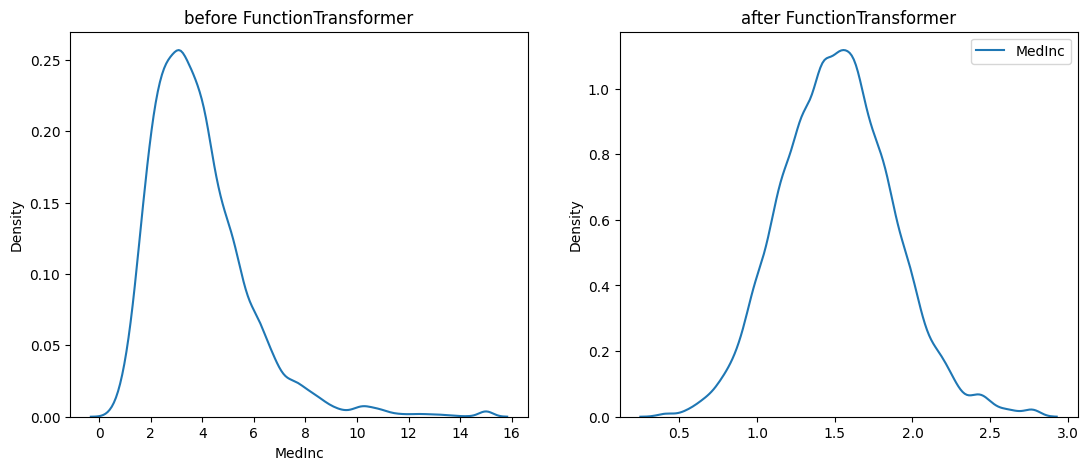

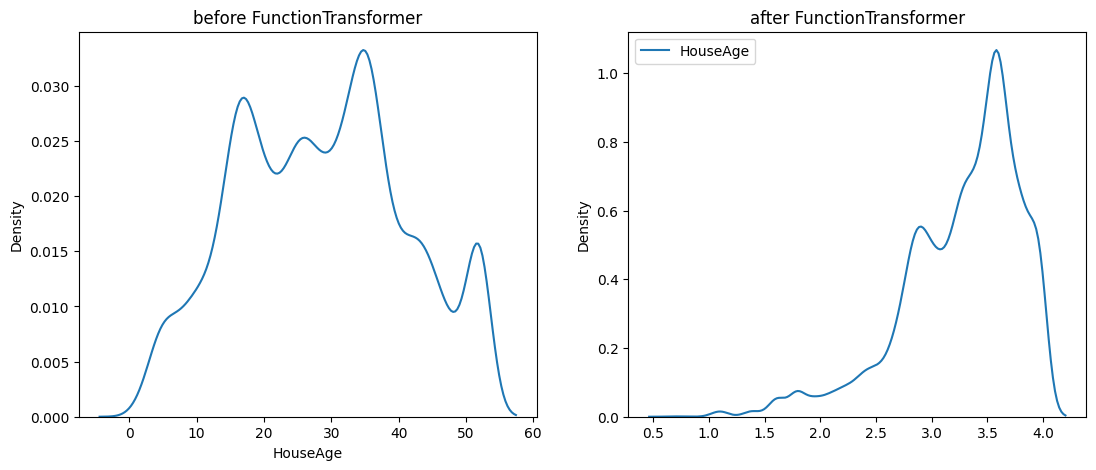

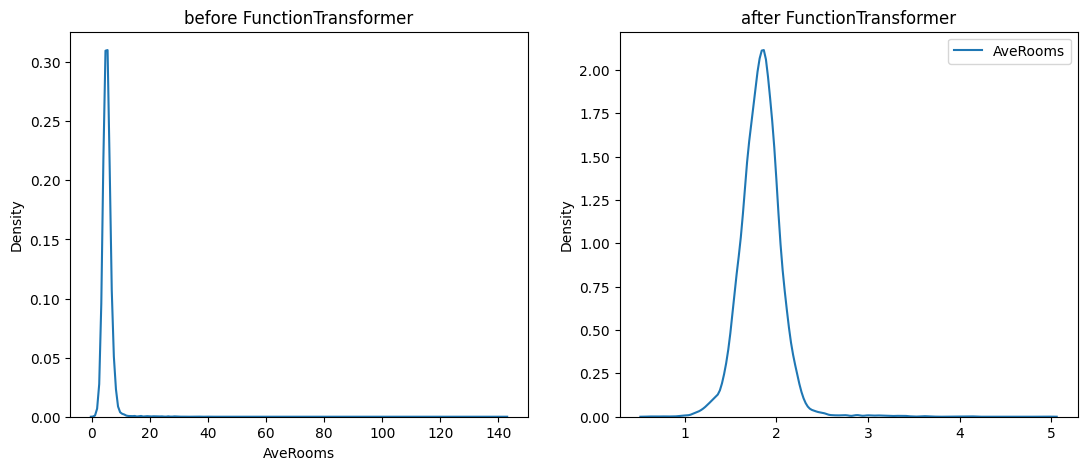

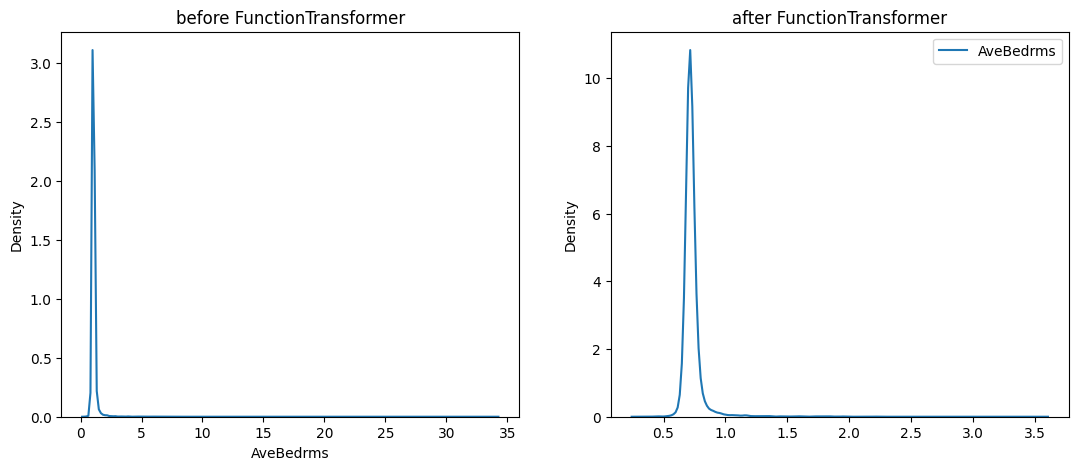

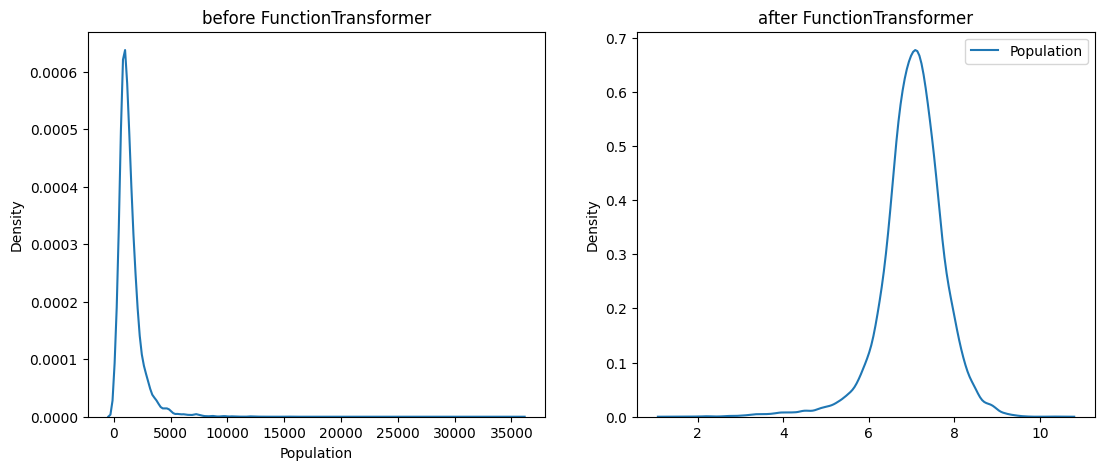

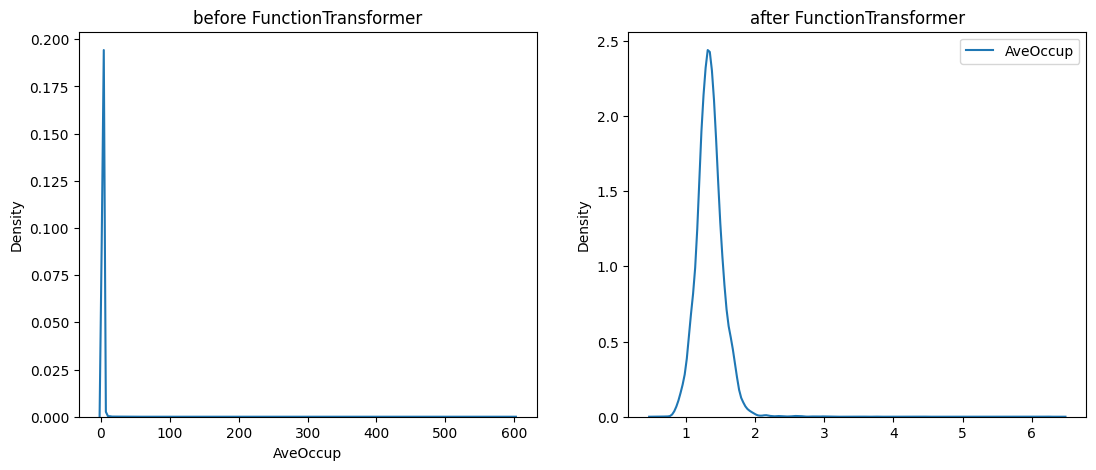

In [11]:
for col in x_train.columns:
  plots(x_train, col, FunctionTransformer(np.log1p))

In [12]:
f = FunctionTransformer(lambda x: np.log1p(x))

In [13]:
x_train['HouseAge'].head()

,HouseAge
12069,6.0
15925,52.0
11162,26.0
4904,38.0
4683,52.0


In [14]:
f.fit_transform(x_train[['HouseAge']]).head()

,HouseAge
12069,1.945910
15925,3.970292
11162,3.295837
4904,3.663562
4683,3.970292


In [15]:
f1 = FunctionTransformer(lambda x: np.power(x, 2))
f1.fit_transform(x_train[['HouseAge']]).head()

,HouseAge
12069,36.0
15925,2704.0
11162,676.0
4904,1444.0
4683,2704.0


In [16]:
f2 = FunctionTransformer(lambda x: np.power(x, 1/2))
f2.fit_transform(x_train[['HouseAge']]).head()

,HouseAge
12069,2.449490
15925,7.211103
11162,5.099020
4904,6.164414
4683,7.211103


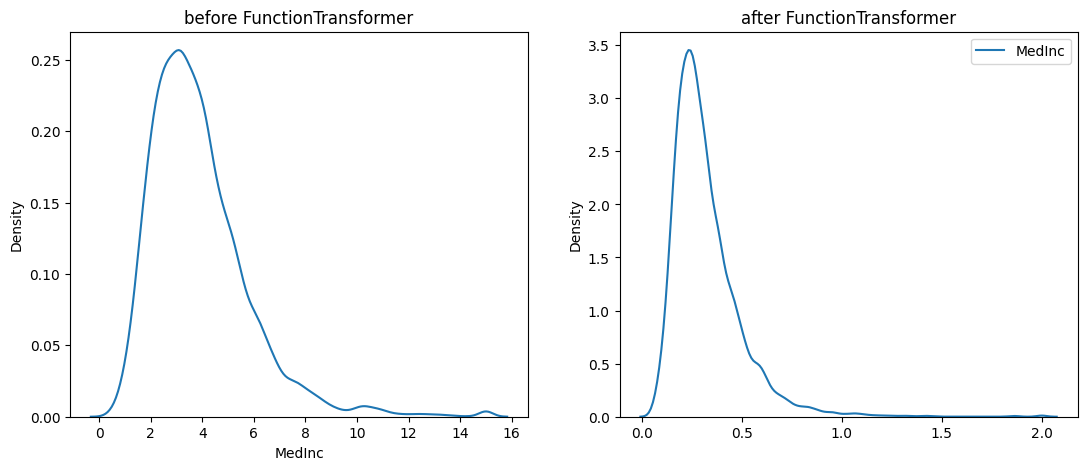

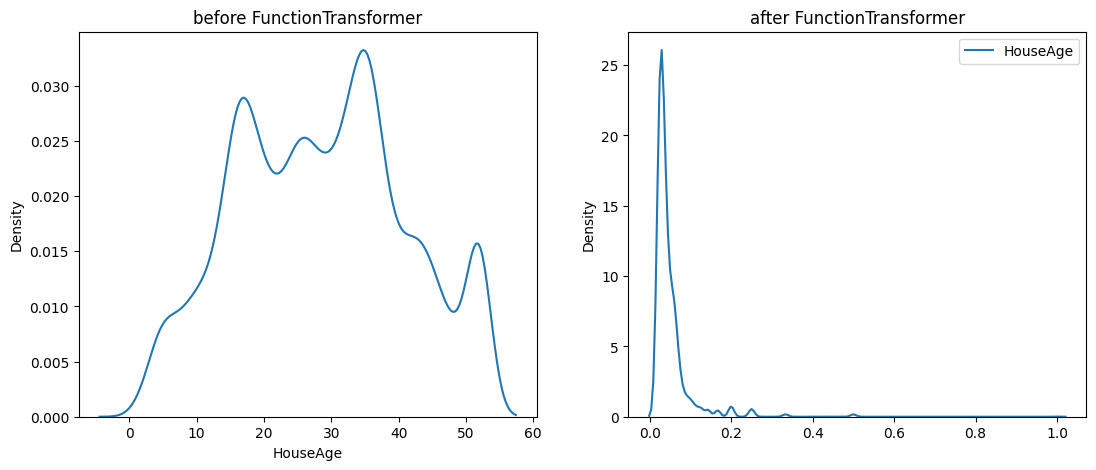

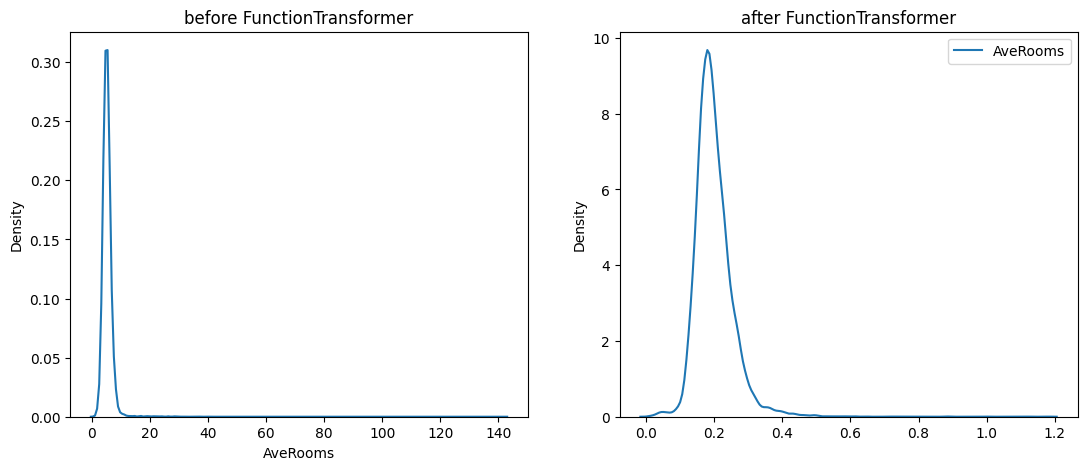

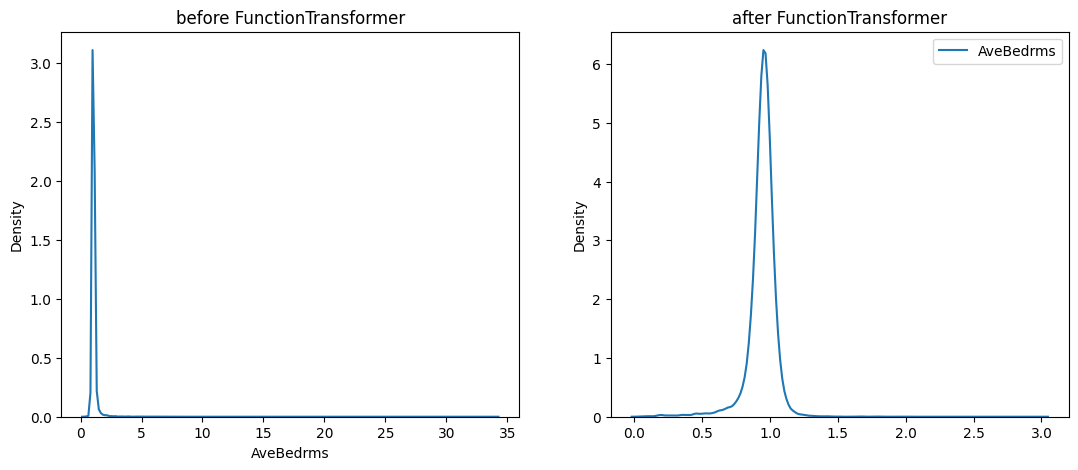

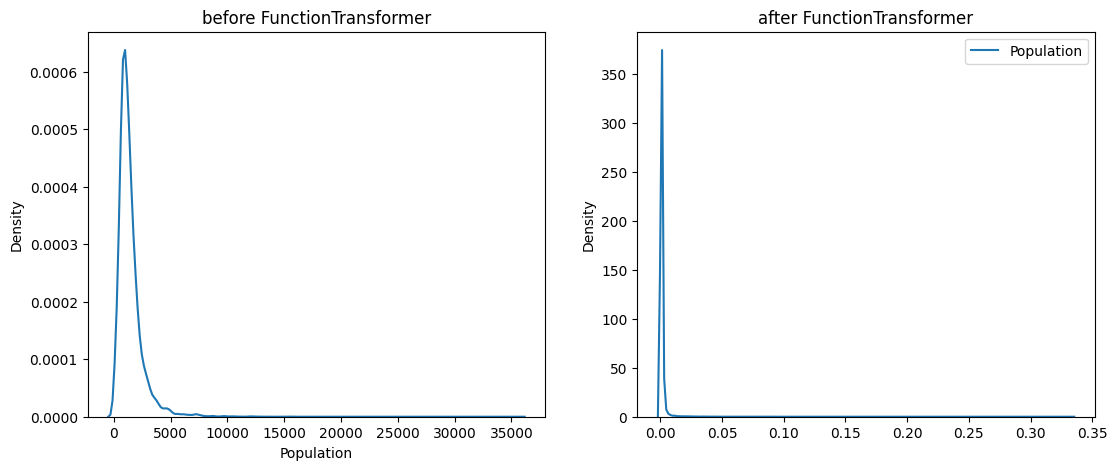

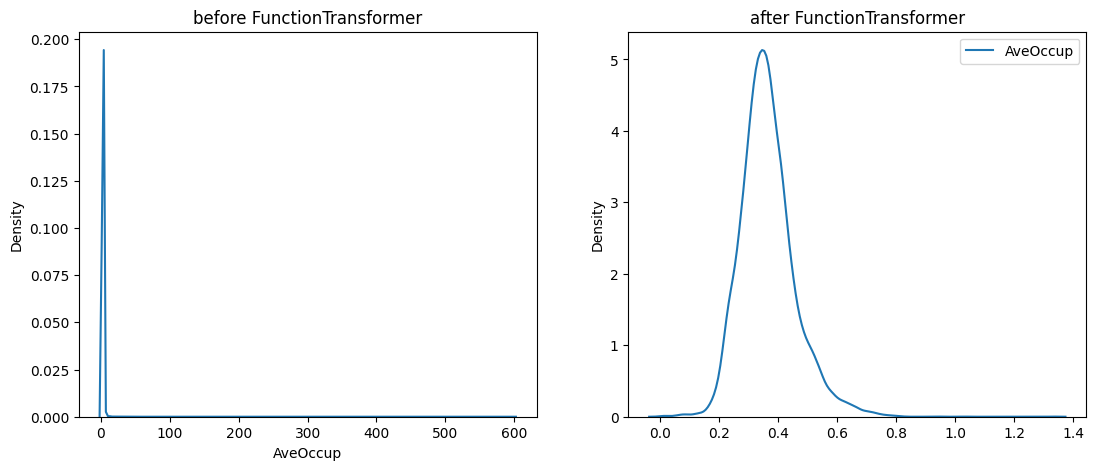

In [17]:
for col in x_train.columns:
  plots(x_train, col, FunctionTransformer(lambda x: np.reciprocal(x)))

<div align="justify">

Function transformers offer a flexible and intuitive way to reshape feature distributions using mathematical functions. When chosen appropriately, they can significantly reduce skewness and make features more suitable for modeling.

### ⏭️ What's Next?

In the subsequent notebooks, we will explore more systematic and distribution-aware transformations — namely, `PowerTransformer` and `QuantileTransformer` — which are designed to automatically normalize skewed data using statistical techniques.

</div>
